In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv("METAR_data\\20150101.txt")
data = pd.read_csv("data\\flights_train.csv")

In [3]:
month = data['MONTH'] == 1
day = data['DAY'] == 1
data= data[month & day]

In [4]:
weather.columns

Index(['station', 'valid', 'lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct',
       'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2',
       'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes',
       'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
       'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'feel', 'metar'],
      dtype='object')

In [42]:
weather.peak_wind_time.unique()

array(['M', '2014-12-31 23:28', '2014-12-31 23:29', ...,
       '2015-01-01 23:15', '2015-01-01 23:44', '2015-01-01 23:25'],
      dtype=object)

In [6]:
# load weather data
airportData = pd.read_csv('data\\airports.csv', low_memory=False)

In [7]:
originAirport = airportData[['LATITUDE', 'LONGITUDE', 'IATA_CODE']]
destenationAirport = airportData[['LATITUDE', 'LONGITUDE', 'IATA_CODE']]
originAirport.rename(columns={'LATITUDE':'ORIGIN_LATITUDE', 'LONGITUDE':'ORIGIN_LONGITUDE', 'IATA_CODE':'ORIGIN_AIRPORT'}, inplace=True)
destenationAirport.rename(columns={'LATITUDE':'DESTINATION_LATITUDE', 'LONGITUDE':'DESTINATION_LONGITUDE', 'IATA_CODE':'DESTINATION_AIRPORT'}, inplace=True)

C:\Users\siebr\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
# Add coords to trainData
data = pd.merge(data, originAirport, on='ORIGIN_AIRPORT')
data = pd.merge(data, destenationAirport, on='DESTINATION_AIRPORT')

In [10]:
data = data.dropna()

In [11]:
# get all locations
locations = data[['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'ORIGIN_AIRPORT']]
locations.insert(0, 'n', 1)
locations = locations.groupby(['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'ORIGIN_AIRPORT']).sum()

In [39]:
def addFeatures(feature):
    weather3 = weather[weather[feature] != 'M']
    data[feature] = 0
#     data[feature] = ''
    for index, row in locations.iterrows():
        weatherIndex = weather3.loc[abs(weather3['lat'] - index[0]+weather3['lon'] - index[1]).idxmin()]
        weather2 = weather3['station'] == weatherIndex['station']
        weather2 = weather3[weather2]
        weather2 = weather2[feature].astype(float).mean()
#         weather2 = weather2[feature].mode()
        data.loc[data['ORIGIN_AIRPORT'] == index[2], feature] = weather2
#         data.loc[data['ORIGIN_AIRPORT'] == index[2], feature] = weather2[0]

featureList = ['tmpf', 'dwpf', 'relh', 'drct',
       'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
       'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
       'peak_wind_gust', 'peak_wind_drct', 'feel']

for feature in featureList:
    addFeatures(feature)


ValueError: could not convert string to float: '2015-01-01 23:32'

In [43]:
addFeatures('feel')

In [44]:
data

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,skyl1,skyl2,skyl3,skyl4,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_drct,peak_wind_time,feel
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,783.018868,2591.666667,5669.230769,20000.0,0.0001,0.0100,0.0001,285.714286,0,30.301698
1,15,2015,1,1,4,AS,108,N309AS,ANC,SEA,...,783.018868,2591.666667,5669.230769,20000.0,0.0001,0.0100,0.0001,285.714286,0,30.301698
2,16,2015,1,1,4,DL,1560,N3743H,ANC,SEA,...,783.018868,2591.666667,5669.230769,20000.0,0.0001,0.0100,0.0001,285.714286,0,30.301698
3,37,2015,1,1,4,AS,134,N464AS,ANC,SEA,...,783.018868,2591.666667,5669.230769,20000.0,0.0001,0.0100,0.0001,285.714286,0,30.301698
4,45,2015,1,1,4,AS,114,N303AS,ANC,SEA,...,783.018868,2591.666667,5669.230769,20000.0,0.0001,0.0100,0.0001,285.714286,0,30.301698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,7999,2015,1,1,4,AS,64,N799AS,PSG,WRG,...,1580.701754,2191.176471,2938.888889,4350.0,0.0001,0.0001,0.0001,161.538462,0,36.460702
13460,2862,2015,1,1,4,AS,55,N508AS,SCC,BRW,...,686.206897,4228.571429,4020.000000,13750.0,0.0001,0.0001,0.0001,82.727273,0,-26.888919
13461,9814,2015,1,1,4,AS,50,N768AS,SCC,BRW,...,686.206897,4228.571429,4020.000000,13750.0,0.0001,0.0001,0.0001,82.727273,0,-26.888919
13462,6095,2015,1,1,4,OO,5315,N928SW,JMS,DVL,...,3480.645161,4475.000000,22985.714286,15000.0,0.0001,0.0001,0.0001,292.500000,0,10.808750


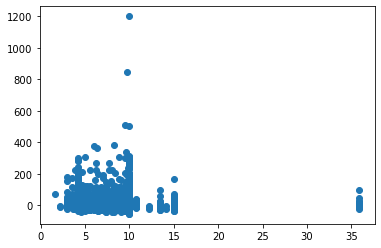

In [15]:
plt.scatter(data['vsby'], data['ARRIVAL_DELAY'])

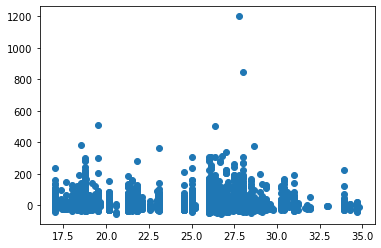

In [18]:
plt.scatter(data['peak_wind_gust'], data['ARRIVAL_DELAY'])

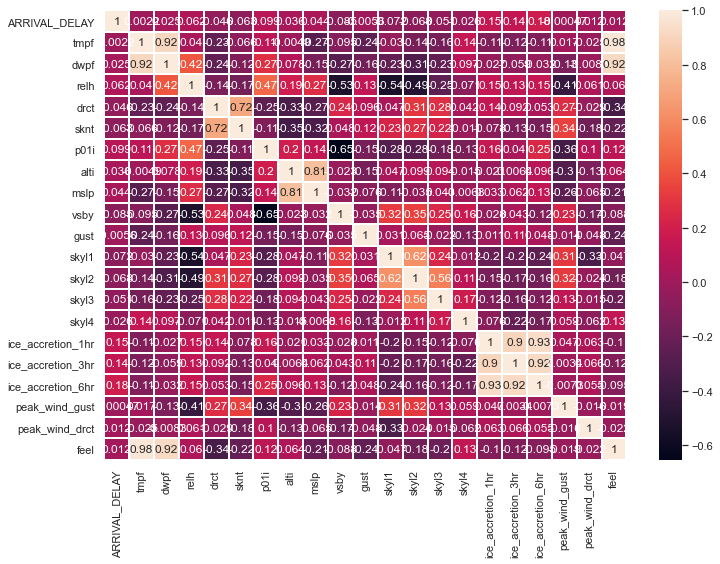

In [45]:
heatmap = data[['ARRIVAL_DELAY', 'tmpf', 'dwpf', 'relh', 'drct',
       'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
       'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
       'peak_wind_gust', 'peak_wind_drct', 'feel']]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns_plot = sns.heatmap(heatmap.corr(),annot=True,lw=1)
figure = sns_plot.get_figure()    

In [ ]:
# weather2 = weather['lat'] == data['ORIGIN_LATITUDE'][0]
# # data= data[month & day]
# weather2 = weather[weather2]